In [ ]:
pip install pytz

In [ ]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 31.9 MB/s eta 0:00:00


Importing all the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pytz
from datetime import datetime, timedelta

# Data Investigation and Cleaning

Load the data

In [ ]:
# Load the data
data = pd.read_csv("jobs__sleepwalk.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'jobs__sleepwalk.csv'

Converting location to countries, but before that we need to make a copy of the original data so that we don't make any changes in original data.

In [ ]:
data.shape

(4547724, 4)

In [ ]:
data_copy = data.copy()

def get_country(city):
    try:
        country_code = city.split(",")[-1].strip()  # Extract country code
        country = pycountry.countries.get(alpha_2=country_code)  # Find country by ISO code
        if country:
            return country.name
        else:
            return None  # Return original city if no match found
    except AttributeError:
        return None # Return original city if AttributeError occurs

# Apply the function to the 'location' column
data_copy['country'] = data_copy['location'].apply(get_country)

# Remove rows where the country is None
data_copy = data_copy.dropna(subset=['country'])

# Drop the 'location' column if needed
data_copy.drop(columns=['location'], inplace=True)

data_copy.head()

<ipython-input-94-67ef638393d6>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,characteristic,utc_timestamp,user_hash,country
651,ceo,1577873259660,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic
660,ceo,1577877168658,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic
728,ceo,1577906515662,fdf15eeefac4faf5a2ad8afd921405c8,Lao People's Democratic Republic
743,ceo,1577910300659,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic
748,ceo,1577910911665,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic


Lets get idea about the characteristics column because we want to plot the data with respect to characteristics.

In [ ]:
data_copy['characteristic'].value_counts()

characteristic
owner               120124
founder              64644
director             44286
president            29723
partner              17422
co-founder           13601
graphic_designer     11408
youtuber              8484
ceo                   5352
vp                     675
cto                    178
prover                  26
Name: count, dtype: int64

Here the values of some characteristics are much smaller when compared to other values. So to maintain the consistency we will drop chracteristics with count less than 5000

In [ ]:
data_copy = data_copy.groupby('characteristic').filter(lambda x: len(x) >= 5000)

In [ ]:
data_copy['characteristic'].value_counts()

characteristic
owner               120124
founder              64644
director             44286
president            29723
partner              17422
co-founder           13601
graphic_designer     11408
youtuber              8484
ceo                   5352
Name: count, dtype: int64

In [ ]:
data_copy['country'].value_counts()

country
Canada            94346
Israel            24632
Gabon             22317
Panama            19309
New Caledonia     17337
                  ...  
Estonia               1
Sri Lanka             1
American Samoa        1
Ethiopia              1
San Marino            1
Name: count, Length: 153, dtype: int64

Here we have some countries with value counts way lesser than other countries. So we will remove the countries with less data.

In [ ]:
data_copy = data_copy.groupby('country').filter(lambda x: len(x) >= 1000)

In [ ]:
data_copy['country'].value_counts()

country
Canada                              94346
Israel                              24632
Gabon                               22317
Panama                              19309
New Caledonia                       17337
Morocco                             14397
Azerbaijan                          11406
Colombia                            11071
Tunisia                             10954
Holy See (Vatican City State)       10801
Mongolia                            10575
Macao                                8717
India                                8161
Moldova, Republic of                 7620
Lao People's Democratic Republic     7348
Albania                              4829
Seychelles                           4558
Cayman Islands                       3783
Montserrat                           2679
Niger                                2378
United States                        2375
Indonesia                            1996
Argentina                            1926
Germany                   

Converting the utc timestamp to country specific time

In [ ]:
timezone_mappings = {
    'Canada': 'America/Toronto',
    'Israel': 'Israel',
    'Gabon': 'Africa/Libreville',
    'Panama': 'America/Panama',
    'New Caledonia': 'Pacific/Noumea',
    'Morocco': 'Africa/Casablanca',
    'Azerbaijan': 'Asia/Baku',
    'Colombia': 'America/Bogota',
    'Tunisia': 'Africa/Tunis',
    'Holy See (Vatican City State)': 'Europe/Vatican',
    'Mongolia': 'Asia/Ulaanbaatar',
    'Macao': 'Asia/Macau',
    'India': 'Asia/Kolkata',
    'Moldova, Republic of': 'Europe/Chisinau',
    'Lao People\'s Democratic Republic': 'Asia/Vientiane',
    'Albania': 'Europe/Tirane',
    'Seychelles': 'Indian/Mahe',
    'Cayman Islands': 'America/Cayman',
    'Montserrat': 'America/Montserrat',
    'United States': 'America/New_York',
    'Niger': 'Africa/Niamey',
    'Indonesia': 'Asia/Jakarta',
    'Argentina': 'America/Argentina/Buenos_Aires',
    'Germany': 'Europe/Berlin',
    'Montenegro': 'Europe/Podgorica'
}

# Function to convert UTC timestamp to country-specific time
def convert_to_country_time(row):
    try:
        country_timezone = pytz.timezone(timezone_mappings[row['country']])
        utc_datetime = datetime.utcfromtimestamp(row['utc_timestamp'] / 1000)  # Convert milliseconds to seconds
        country_time = pytz.utc.localize(utc_datetime).astimezone(country_timezone)
        return country_time.strftime('%Y-%m-%d %H:%M:%S')
    except KeyError:
        print(f"Timezone mapping not found for {row['country']}")
        return None

# Apply the conversion function to create a new column for country-specific time
data_copy['country_time'] = data_copy.apply(convert_to_country_time, axis=1)

In [ ]:
data_copy.head()

,characteristic,utc_timestamp,user_hash,country,country_time
651,ceo,1577873259660,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-01 17:07:39
660,ceo,1577877168658,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-01 18:12:48
728,ceo,1577906515662,fdf15eeefac4faf5a2ad8afd921405c8,Lao People's Democratic Republic,2020-01-02 02:21:55
743,ceo,1577910300659,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-02 03:25:00
748,ceo,1577910911665,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-02 03:35:11


Now we will add the column with only hour in which he posts the tweets.

In [ ]:
# Convert the timestamp column to datetime type
data_copy['country_time'] = pd.to_datetime(data_copy['country_time'])

# Extract only the hour component from the timestamp column
data_copy['hour'] = data_copy['country_time'].apply(lambda x: x.hour)

data_copy.head()

,characteristic,utc_timestamp,user_hash,country,country_time,hour
651,ceo,1577873259660,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-01 17:07:39,17
660,ceo,1577877168658,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-01 18:12:48,18
728,ceo,1577906515662,fdf15eeefac4faf5a2ad8afd921405c8,Lao People's Democratic Republic,2020-01-02 02:21:55,2
743,ceo,1577910300659,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-02 03:25:00,3
748,ceo,1577910911665,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-02 03:35:11,3


# Data Visualization

##Number of tweets in a day from all the countries.

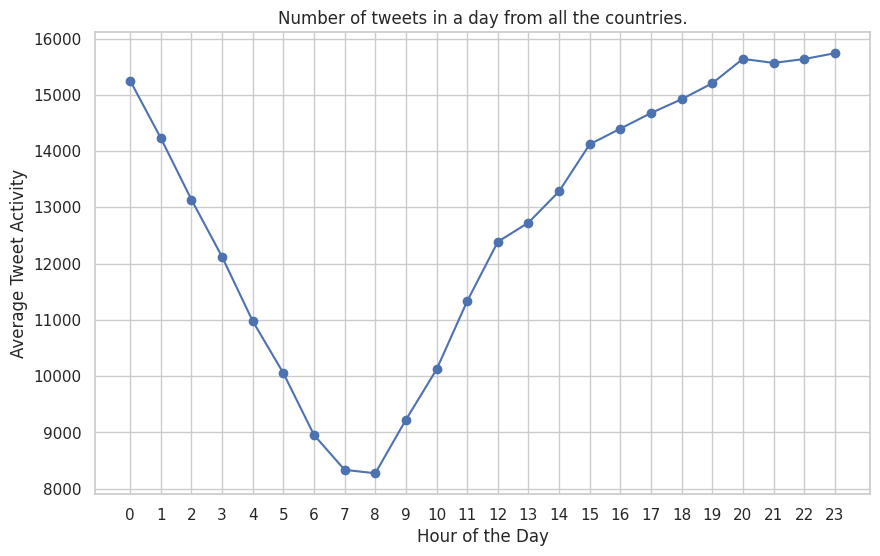

In [ ]:
# Group data by hour of the day and calculate average tweet activity
average_activity = data_copy.groupby('hour').size().reset_index(name='average_activity')

# Plot circadian rhythm
plt.figure(figsize=(10, 6))
plt.plot(average_activity['hour'], average_activity['average_activity'], marker='o', linestyle='-')
plt.title('Number of tweets in a day from all the countries.')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.show()


##Last Tweet in a day

In [ ]:
data_copy_sorted = data_copy.sort_values(by='country_time', ascending=False)

# Group the sorted DataFrame by 'user_hash' and select the first row of each group
last_tweet_data = data_copy_sorted.groupby('user_hash').first().reset_index()

last_tweet_data.head()


,user_hash,characteristic,utc_timestamp,country,country_time,hour
0,000240dfcacfc7f3dc97d46e2d081a3f,ceo,1604243669660,Canada,2020-11-01 10:14:29,10
1,0002a1d566a4e2f9de7f11bd3b98facf,owner,1600962133666,India,2020-09-24 21:12:13,21
2,0002cd3cd753f9622d3c65b9ab4c49db,owner,1584847221664,Colombia,2020-03-21 22:20:21,22
3,0003973202ab4f9061061dbbdd785306,owner,1603222489663,Gabon,2020-10-20 20:34:49,20
4,0006017ab67a1e4602e8bdd26365c3c1,director,1596455531660,Holy See (Vatican City State),2020-08-03 13:52:11,13


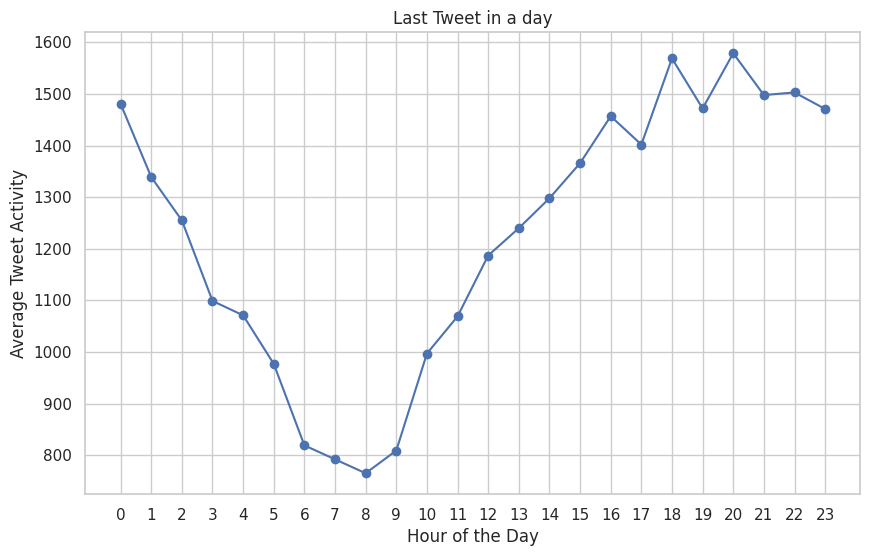

In [ ]:
# Group data by hour of the day and calculate average tweet activity
average_activity = last_tweet_data.groupby('hour').size().reset_index(name='average_activity')

# Plot circadian rhythm
plt.figure(figsize=(10, 6))
plt.plot(average_activity['hour'], average_activity['average_activity'], marker='o', linestyle='-')
plt.title('Last Tweet in a day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.show()


## Job title

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique characteristics in the dataframe
unique_characteristics = data_copy['characteristic'].unique()

# Loop through each characteristic and create a separate plot
for characteristic in unique_characteristics:
    # Filter the dataframe for the current characteristic
    characteristic_df = data_copy[data_copy['characteristic'] == characteristic]

    # Plot using Seaborn's displot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
    sns.countplot(x='hour', data=characteristic_df)
    plt.title(f'Number of Tweets by Hour for {characteristic}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('No. of Tweets')
    plt.tight_layout()
    plt.show()

##Country wise plot, Average tweet activity per hour

In [ ]:
average_activity = last_tweet_data.groupby(['country', 'hour']).size().reset_index(name='average_activity')

# Get unique countries
countries = average_activity['country'].unique()


In [ ]:
average_activity

,country,hour,average_activity
0,Albania,0,25
1,Albania,1,34
2,Albania,2,22
3,Albania,3,23
4,Albania,4,35
...,...,...,...
592,United States,19,12
593,United States,20,3
594,United States,21,9
595,United States,22,4


In [ ]:
import plotly.express as px
import pandas as pd

# Z-score normalization function
def z_score_normalize(data):
    mean = data.mean()
    std_dev = data.std()
    return (data - mean) / std_dev

# Normalize average_activity column
df = average_activity.copy()
df['average_activity_normalized'] = df.groupby('country')['average_activity'].transform(z_score_normalize)

# Plotting with Plotly Express
fig = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="average_activity_normalized",
                    hover_name="country",
                    animation_frame="hour",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Normalized Average Tweet Activity by Hour',
                  geo=dict(showframe=False, showcoastlines=False))
fig.show()

## Seasonal Effect for each country. Fall vs Spring

Extracting Month from the country_time and adding to column month.

In [ ]:
data_copy['month'] = data_copy['country_time'].dt.month

In [ ]:
data_copy.head()

,characteristic,utc_timestamp,user_hash,country,country_time,hour,month
651,ceo,1577873259660,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-01 17:07:39,17,1
660,ceo,1577877168658,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-01 18:12:48,18,1
728,ceo,1577906515662,fdf15eeefac4faf5a2ad8afd921405c8,Lao People's Democratic Republic,2020-01-02 02:21:55,2,1
743,ceo,1577910300659,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-02 03:25:00,3,1
748,ceo,1577910911665,e275558ca07d1abd59ee4294cd1bdc9b,Lao People's Democratic Republic,2020-01-02 03:35:11,3,1


In [ ]:
# Define a function to categorize months into seasons
def categorize_season(month, hemisphere='northern'):
    spring_months = [3, 4, 5] if hemisphere == 'northern' else [9, 10, 11]
    fall_months = [9, 10, 11] if hemisphere == 'northern' else [3, 4, 5]

    if month in spring_months:
        return 'Spring'
    elif month in fall_months:
        return 'Fall'
    else:
        return 'Other'

# Apply the function to create a 'season' column
hemisphere = 'northern'  # Change to 'southern' if your data mostly concerns the Southern Hemisphere
data_copy['season'] = data_copy['month'].apply(lambda x: categorize_season(x, hemisphere))

# Filter out the 'Other' seasons if you only want to plot 'Spring' and 'Fall'
data_seasons = data_copy[data_copy['season'].isin(['Spring', 'Fall'])]

# Group by country, season, and hour
grouped_seasons = data_seasons.groupby(['country', 'season', 'hour']).size().reset_index(name='tweet_count')

# Z-score normalization function
def z_score_normalize(data):
    mean = data.mean()
    std_dev = data.std()
    return (data - mean) / std_dev

# Normalize tweet_count column using Z-score normalization
grouped_seasons['tweet_count_normalized'] = grouped_seasons.groupby(['country', 'season'])['tweet_count'].transform(z_score_normalize)


# Plotting with Plotly Express
fig = px.choropleth(grouped_seasons,
                    locations="country",
                    locationmode="country names",
                    color="tweet_count",
                    hover_name="country",
                    animation_frame="hour",
                    facet_col="season",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Tweet Activity by Season and Hour',
                  geo=dict(showframe=False, showcoastlines=False))
fig.show()

## Time Course effect throughout the year for all countries

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




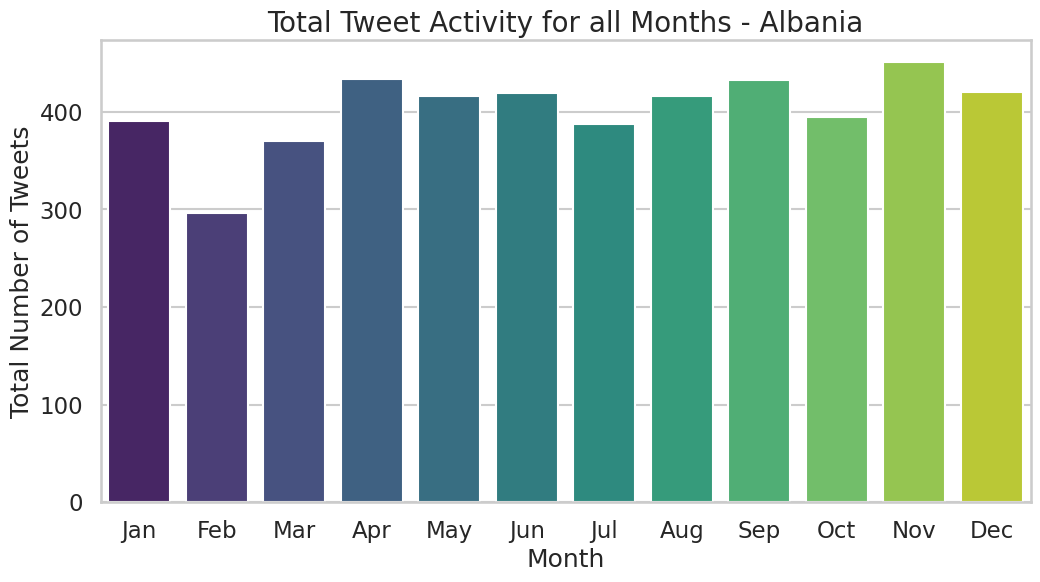

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




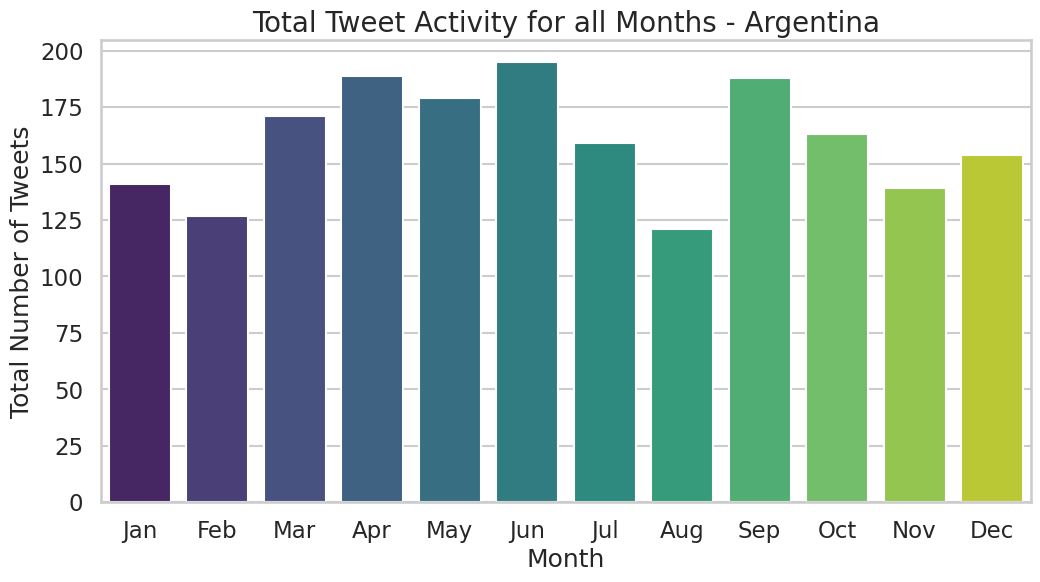

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




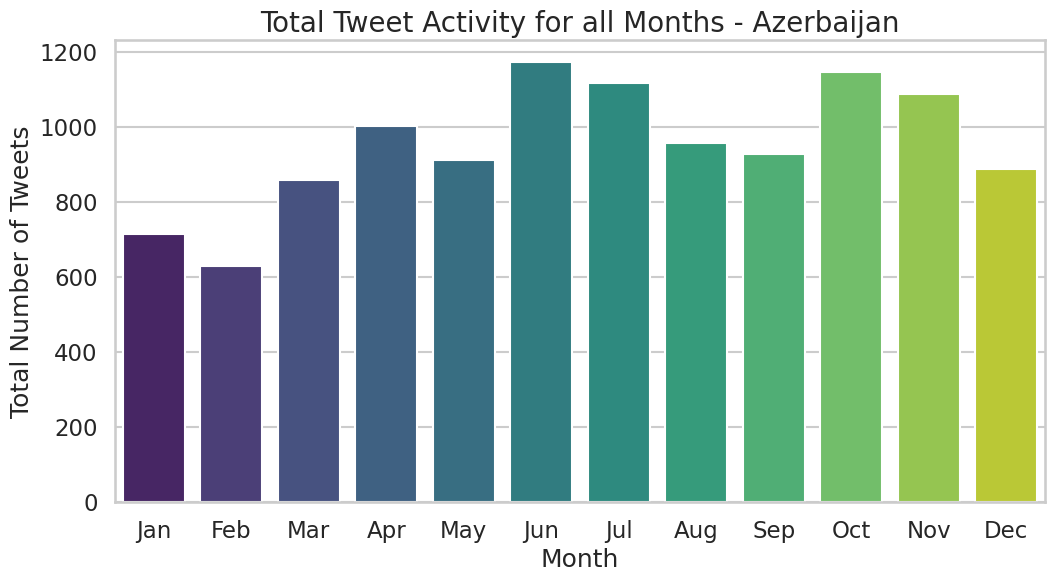

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




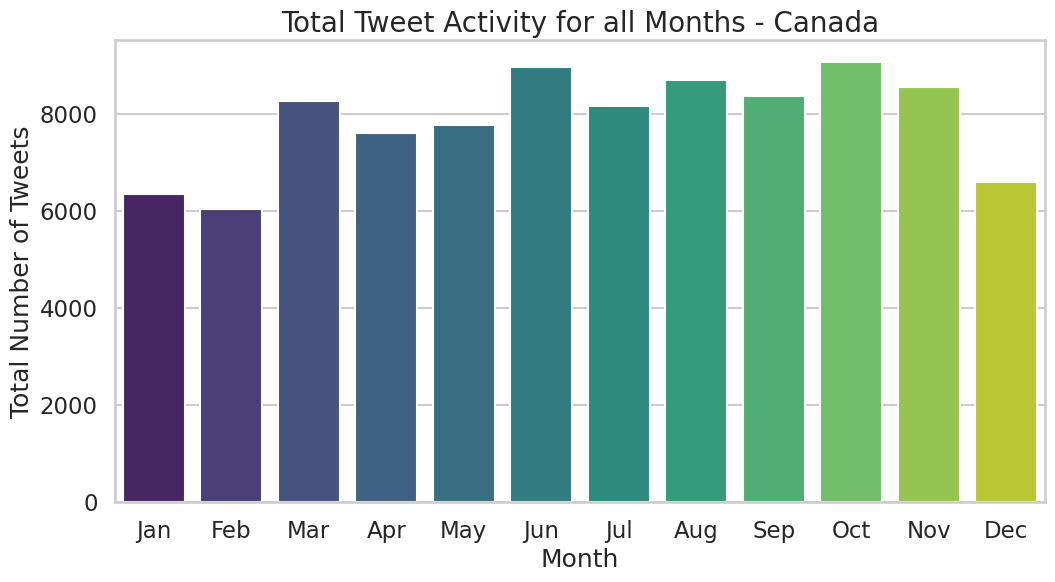

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




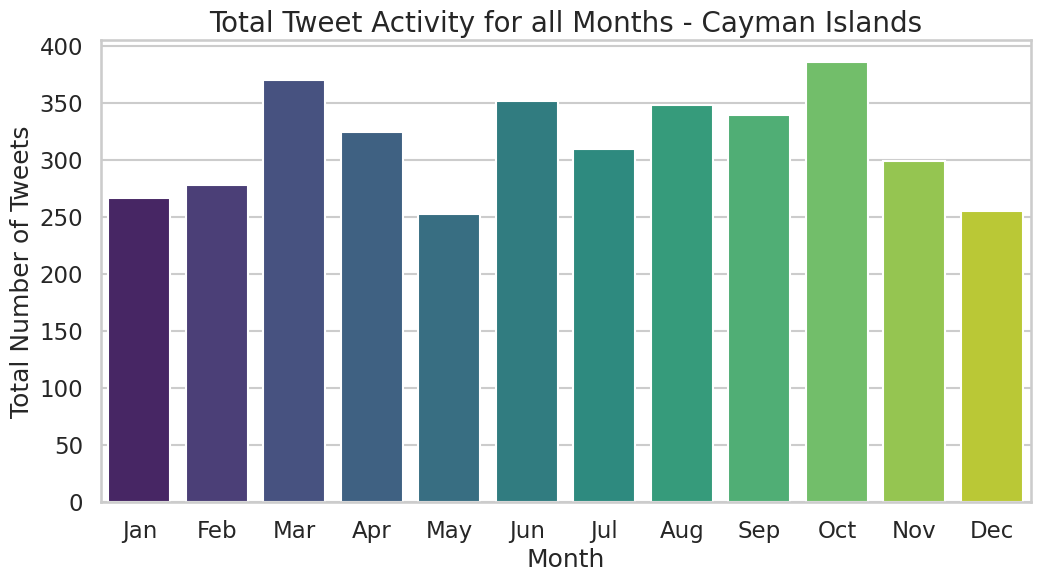

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




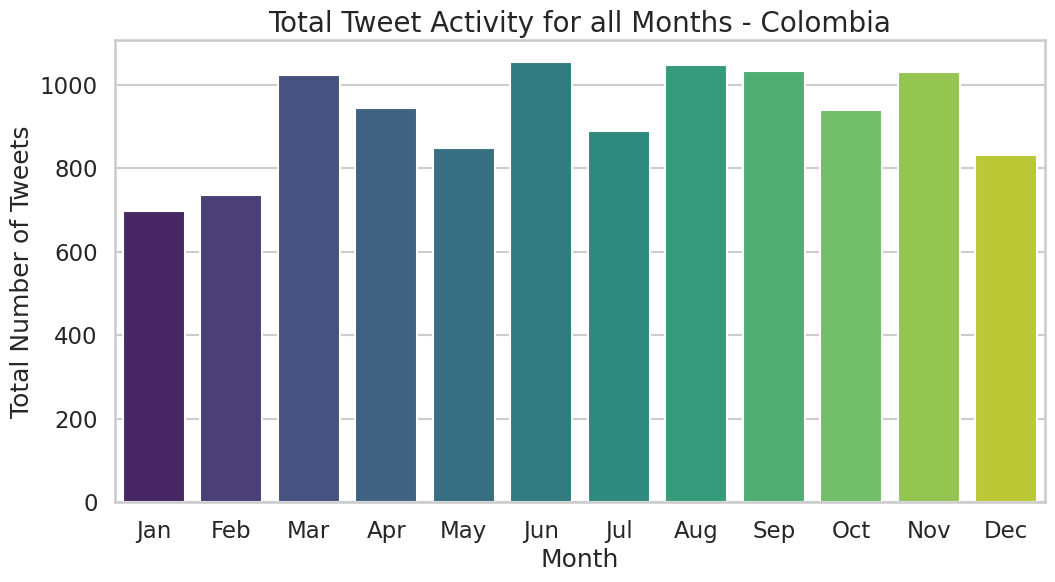

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




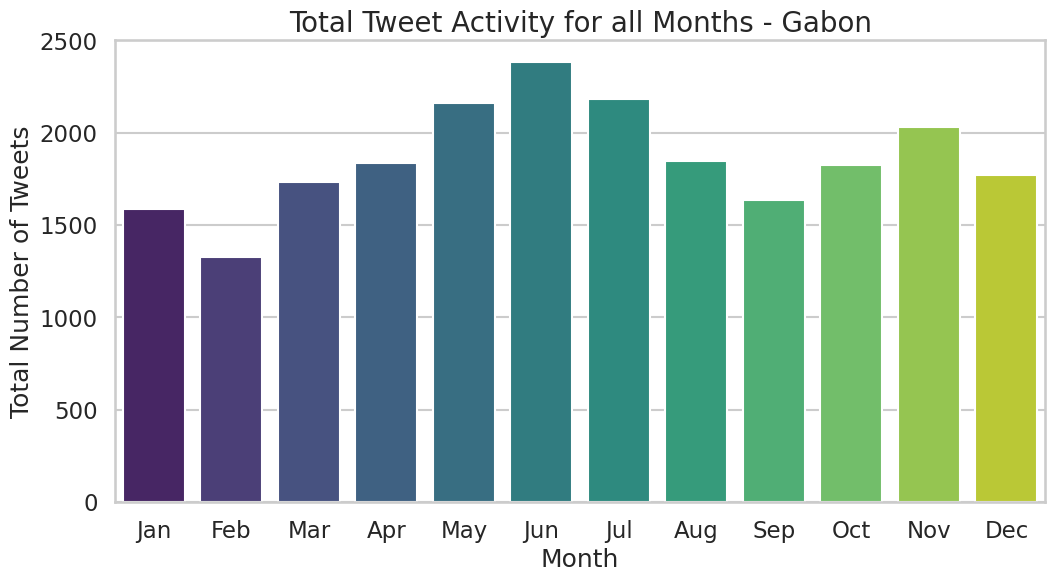

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




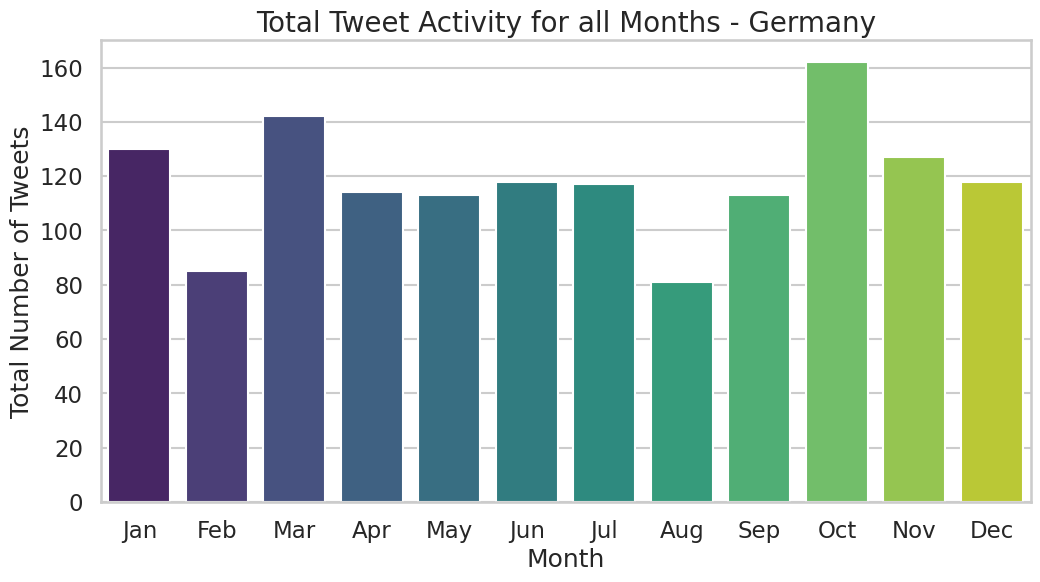

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




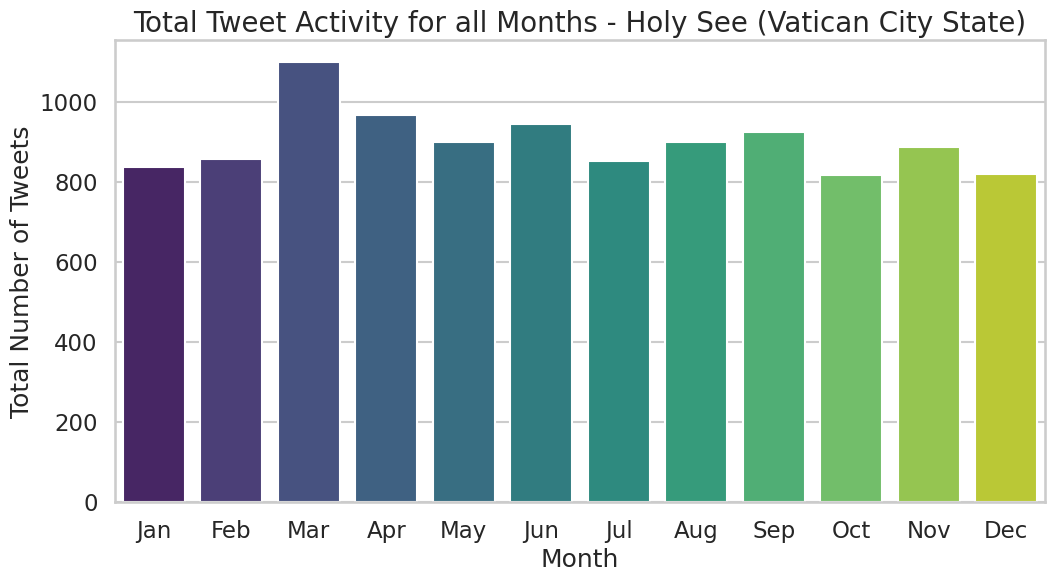

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




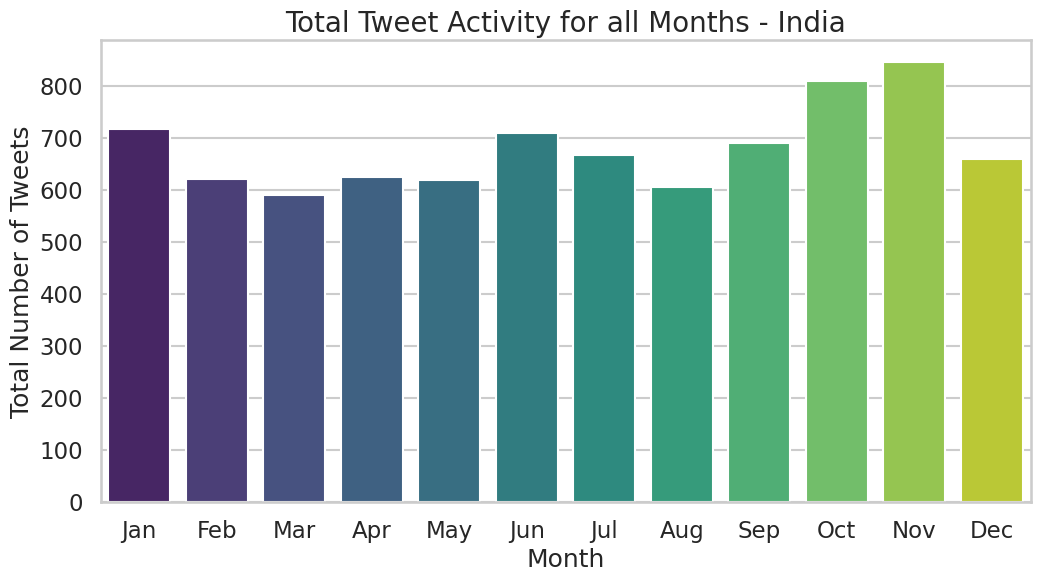

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




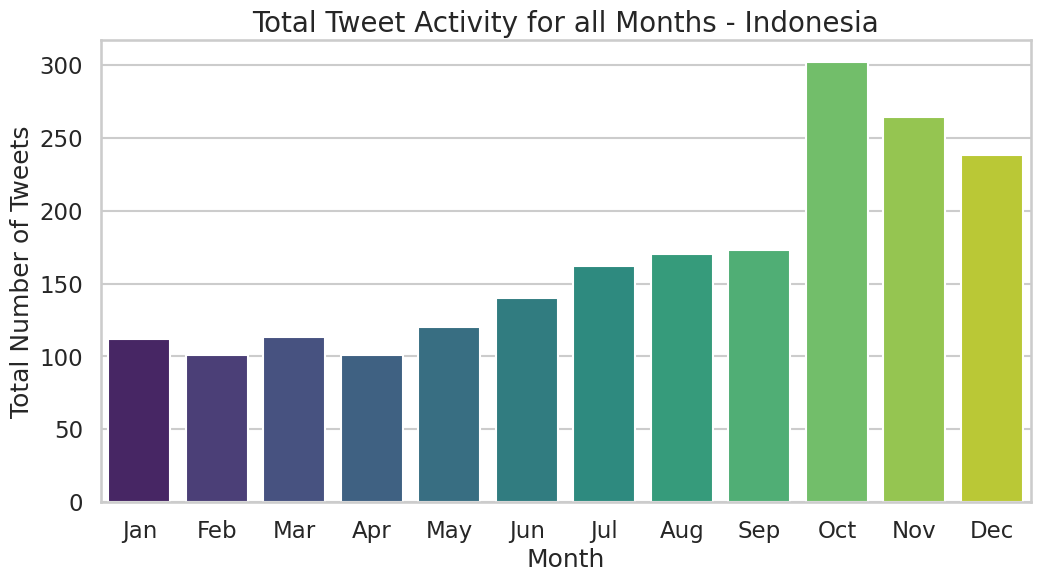

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




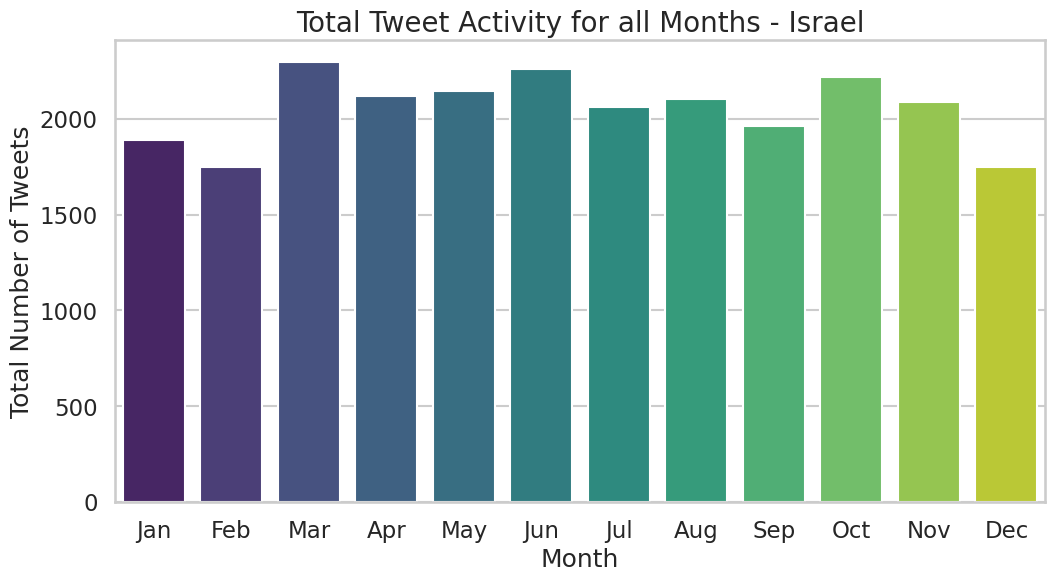

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




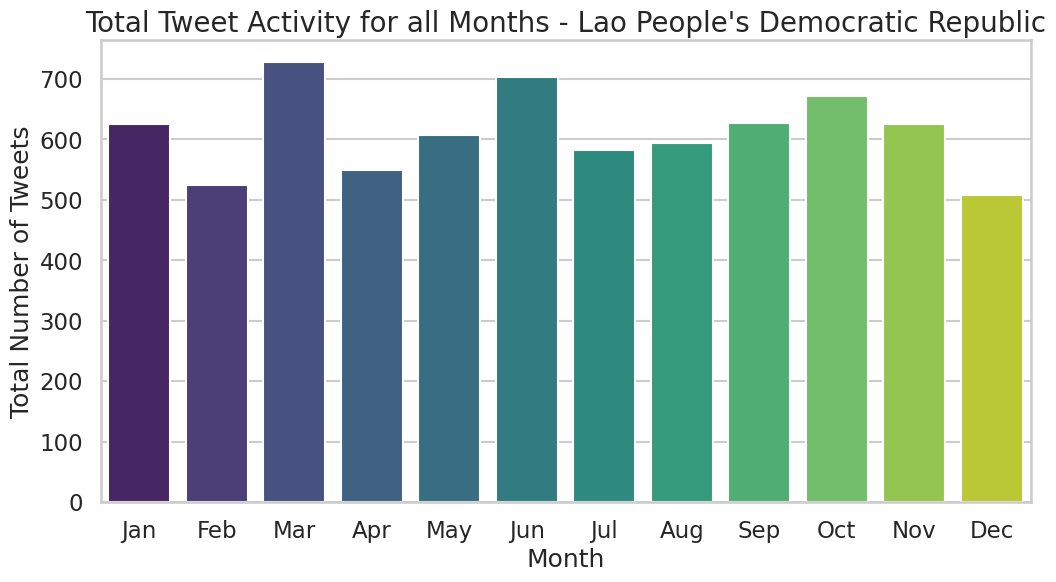

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




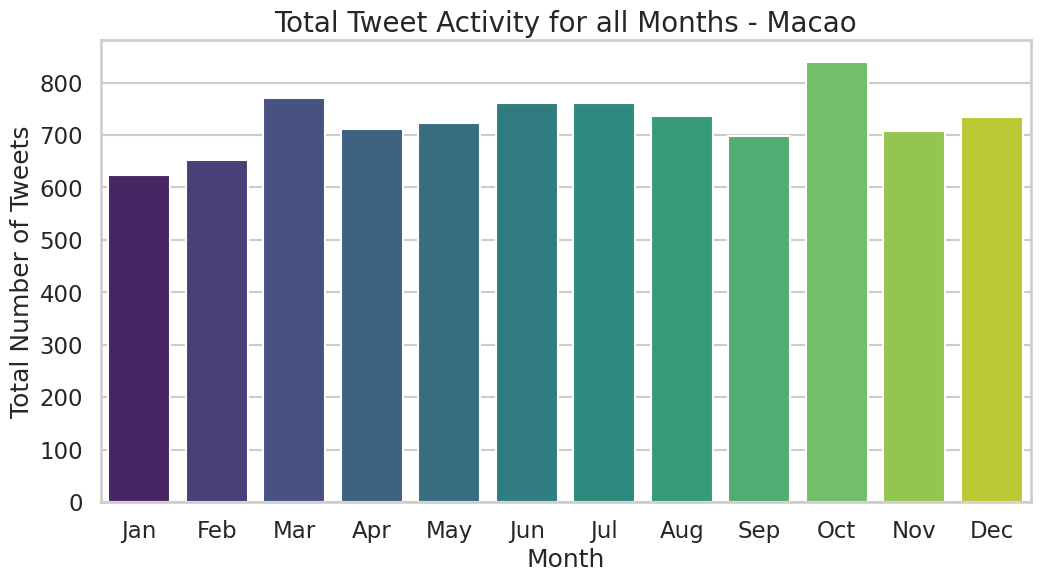

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




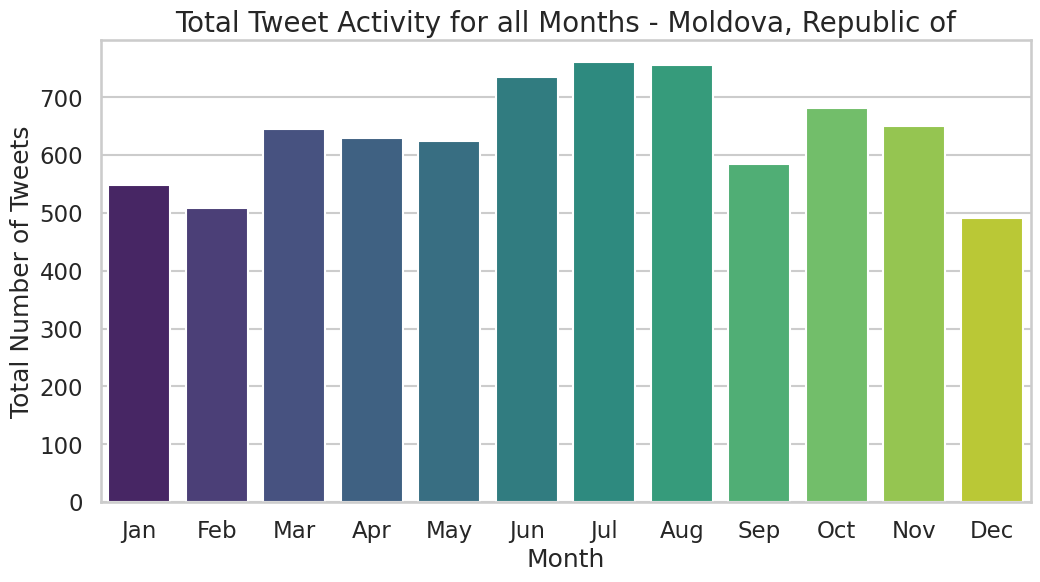

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




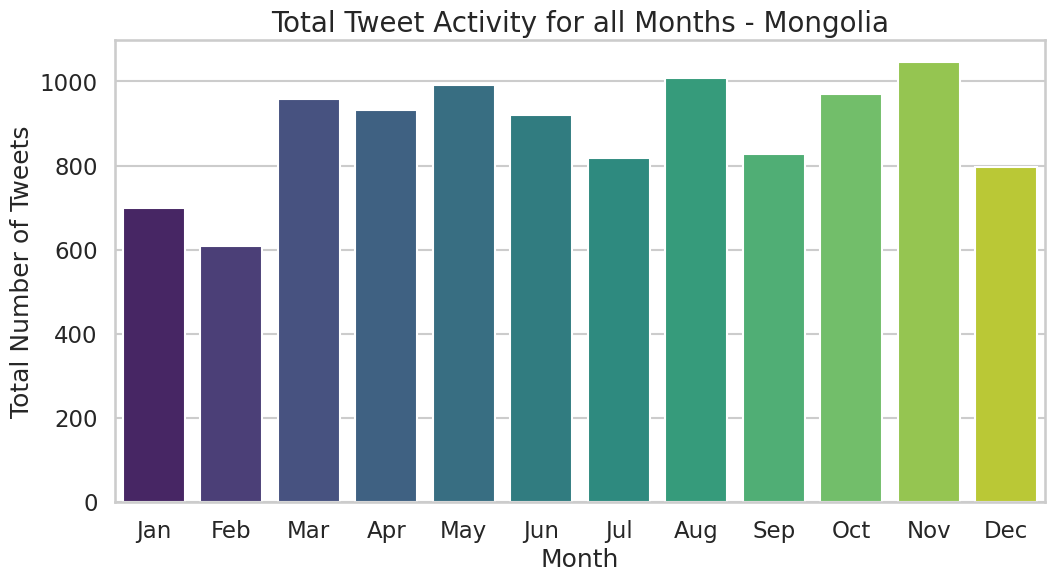

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




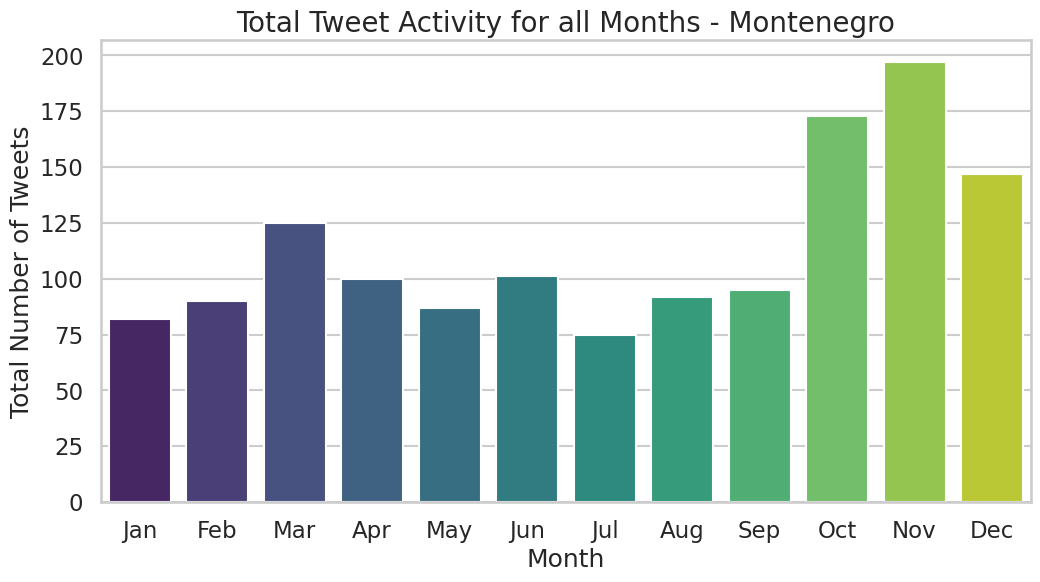

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




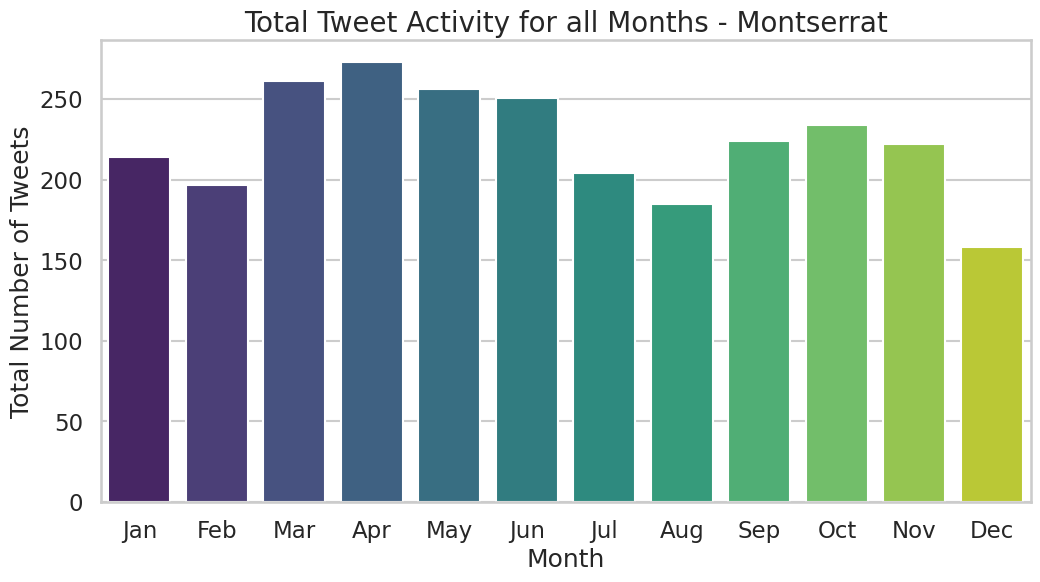

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




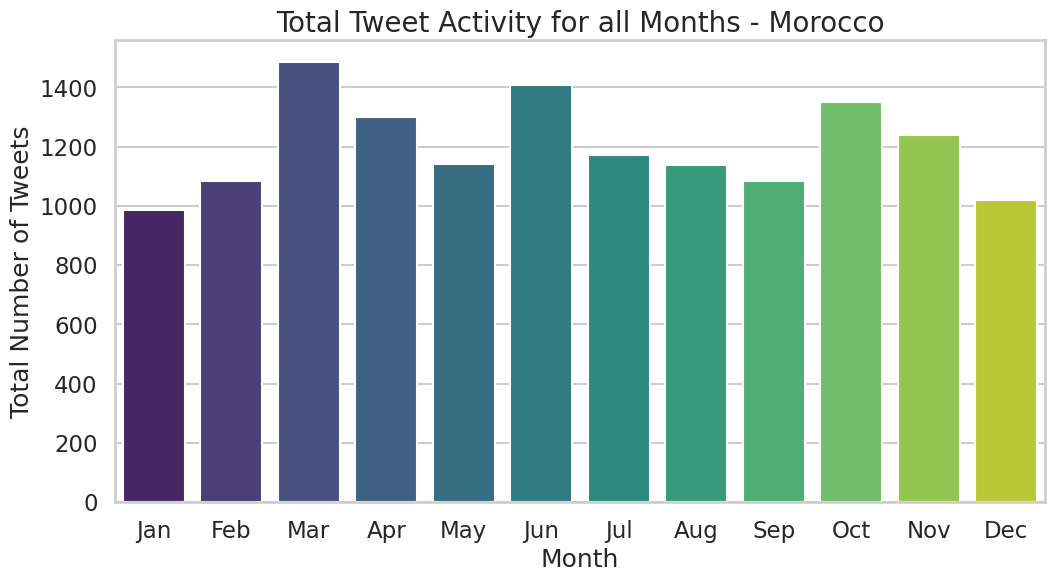

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




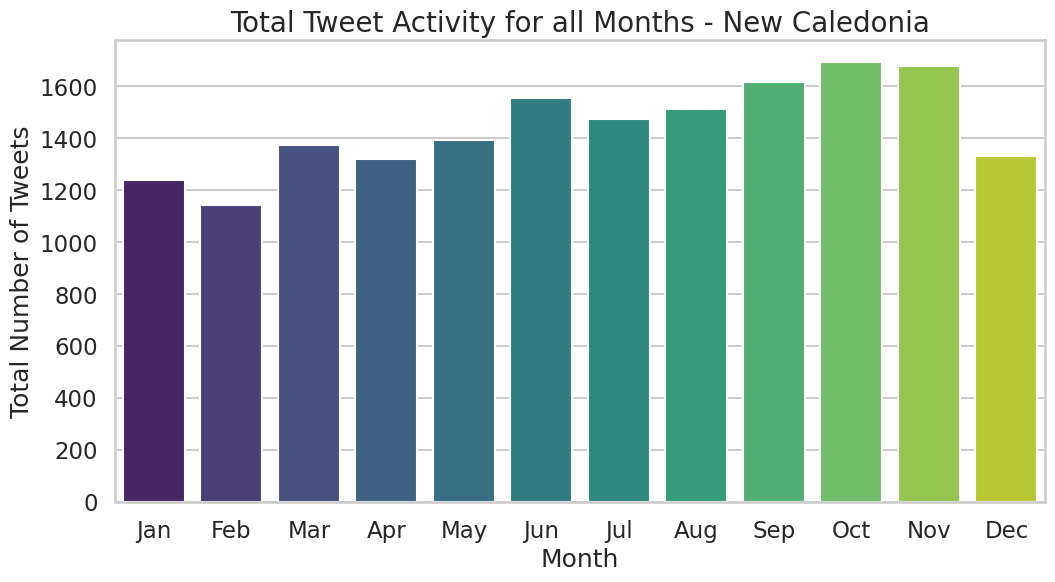

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




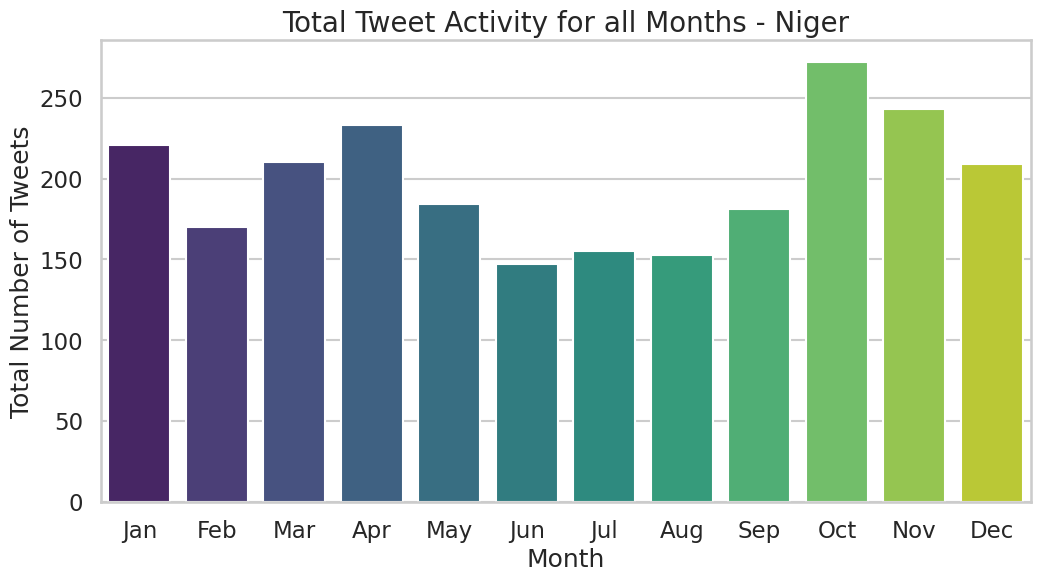

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




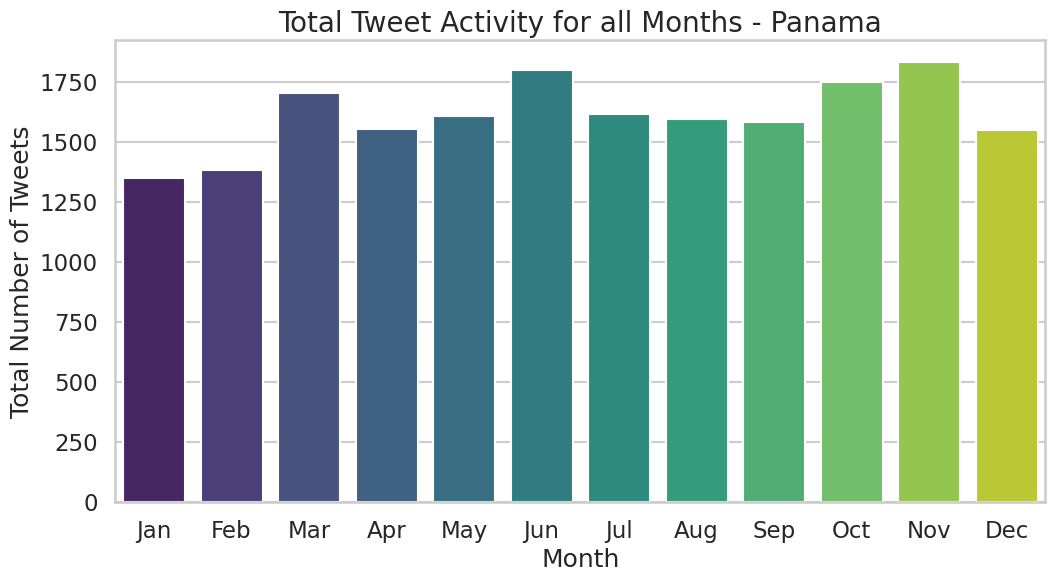

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




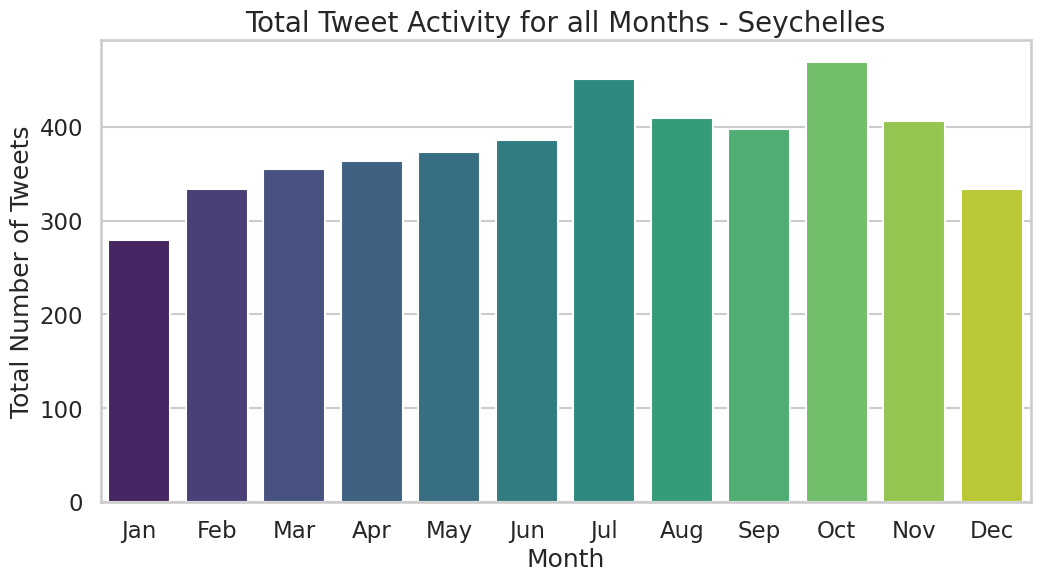

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




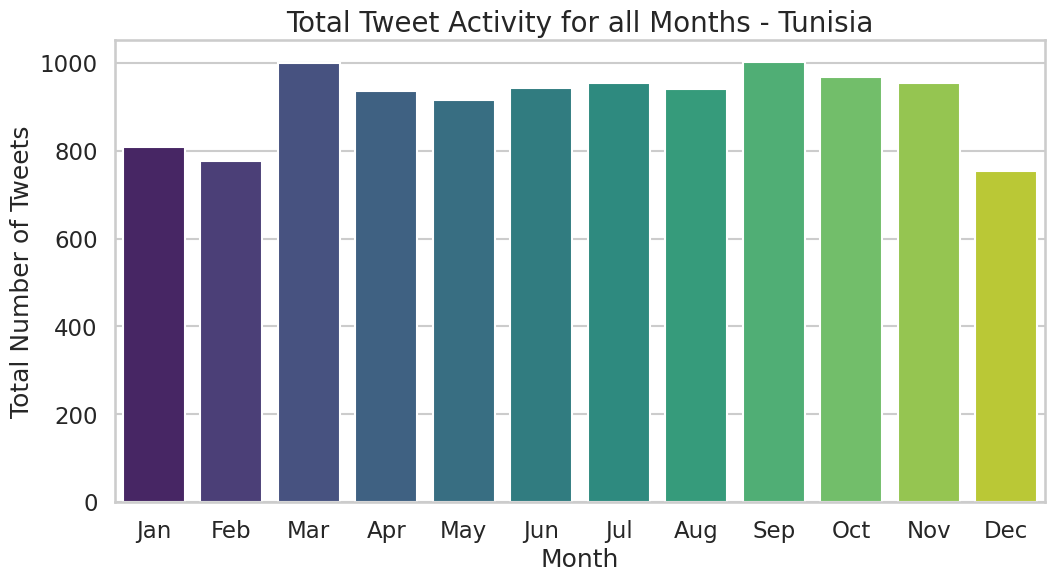

<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-113-6ce1b5f9dc95>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




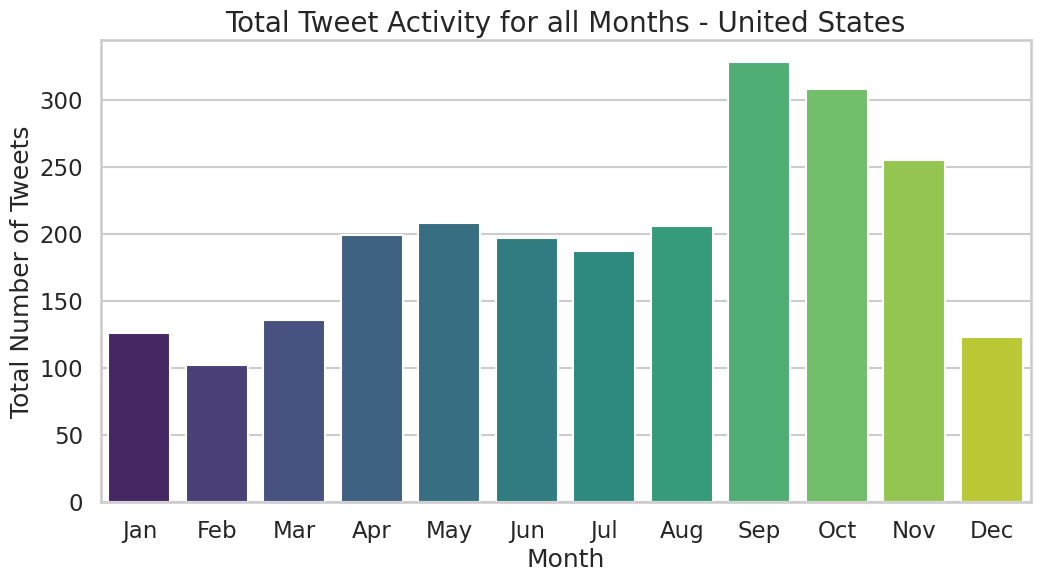

In [ ]:
# Group by country and month to sum tweet counts across all hours
grouped = data_copy.groupby(['country', 'month']).size().reset_index(name='tweet_count')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
sns.set_context("talk")  # This enlarges the labels, titles, and ticks

for country in grouped['country'].unique():
    # Filter the DataFrame for the current country
    country_data = grouped[grouped['country'] == country]

    # Plot configuration
    plt.figure(figsize=(12, 6))  # Adjust the size as needed
    sns.barplot(x='month', y='tweet_count', data=country_data, palette='viridis', ci=None)

    # Set plot titles and labels with increased font size
    plt.title(f'Total Tweet Activity for all Months - {country}', fontsize=20)
    plt.xlabel('Month')
    plt.ylabel('Total Number of Tweets')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Display the plot
    plt.show()


## Time Course effect throughout the year for all the countries.

<ipython-input-114-0f048c963194>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-114-0f048c963194>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




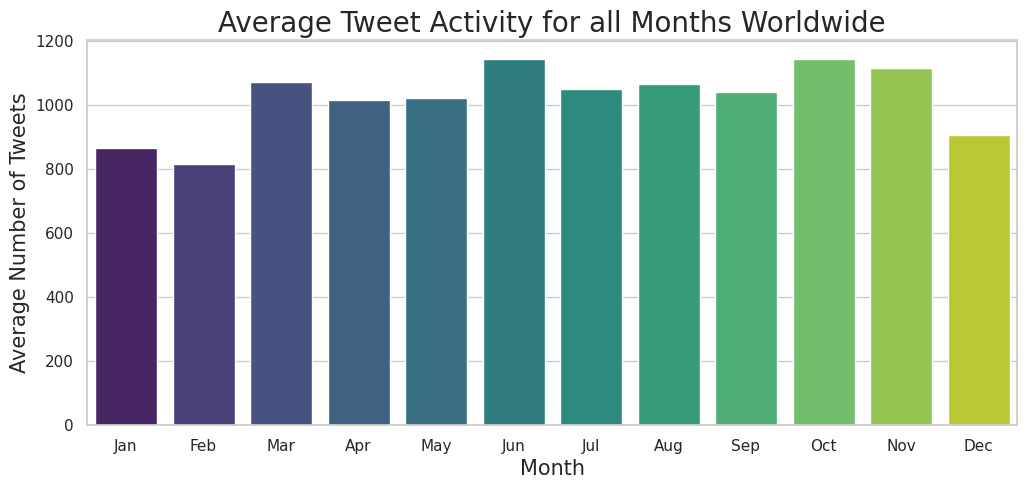

In [ ]:
# Simulate group by 'country' and 'month', and count tweets
grouped = data_copy.groupby(['country', 'month']).size().reset_index(name='tweet_count')

# Now, group by 'month' only to get the average tweet count across all countries
monthly_average = grouped.groupby('month')['tweet_count'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
#sns.set_context("talk")  # This enlarges the labels, titles, and ticks

# Plot configuration
plt.figure(figsize=(12, 5))
sns.barplot(x='month', y='tweet_count', data=monthly_average, palette='viridis', ci=None)

# Set plot titles and labels with increased font size
plt.title('Average Tweet Activity for all Months Worldwide', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Number of Tweets', fontsize=15)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.show()
